# Model from data
First we take some values from a lead acid batery cell voltage vs soc and apply a curve fitting algorith.
The fitted curve is:
$$  aln(bx) + cd^{ex} + fx +g $$
Witch is a logaritmic and exponential approach combined with a linear function.

matrix cond is: 1.4952383950277238e+26
max error is: 0.5280%
min error is: 0.0043%
mean error is: 0.1344%


C:\Users\esteb\AppData\Local\Temp/ipykernel_9540/420160635.py:11: RuntimeWarning: divide by zero encountered in log
  return ( a*np.log(b*x) + c*d**(e*x) + f*x +g)


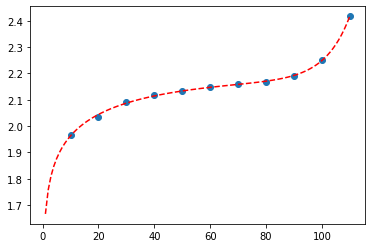

In [10]:
import sympy as sym
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

soc = np.linspace(10, 110, 11)
vt = np.array([ 11.8, 12.2, 12.55, 12.7, 12.8, 12.9, 12.95, 13, 13.15, 13.5, 14.5 ])
f= lambda x: x/6
vcell = f(vt)
def model(x, a, b, c, d,e,f, g):
	return ( a*np.log(b*x) + c*d**(e*x) + f*x +g)
def modelLatex(x, a, b, c, d,e,f, g):
	return ( a*sym.log(b*x) + c*d**(e*x) + f*x +g)
popt, pcov = curve_fit(model, soc, vcell, bounds=((0, 0, 0, 0, -np.inf, -np.inf, 0), (np.inf, np.inf, np.inf, np.inf, 0, 0, np.inf) ), absolute_sigma=False)
perr = np.sqrt(np.diag(pcov))
#print(f"popt: {popt}")
#print(pcov)
#print(f"error is: {perr}")
plt.scatter(soc, vcell)
soc_line = np.arange(0, 111, 1)
vcell_model = model(soc_line, *popt)
plt.plot(soc_line, vcell_model, '--', color='red')
from numpy import linalg as LA
cond = LA.cond(pcov)
print(f"matrix cond is: {cond}")
error = lambda x: np.absolute(model(x, *popt)/vcell[(x/10-1).astype(int)] - 1)
print(f"max error is: {np.max(error(soc)):.4%}") 
print(f"min error is: {np.min(error(soc)):.4%}") 
print(f"mean error is: {np.mean(error(soc)):.4%}")


The model fits well:

* max error is: 0.5280%
* min error is: 0.0043%
* mean error is: 0.1344%

Them we round parameters to fit into ltspice and check added error isn't too big.

potR [ 1.33e-01  8.79e-01  8.99e-07  8.95e-01 -1.02e+00 -1.10e-03  1.68e+00]
max error is: 0.8683%
min error is: 0.0617%
mean error is: 0.3644%


C:\Users\esteb\AppData\Local\Temp/ipykernel_9540/420160635.py:11: RuntimeWarning: divide by zero encountered in log
  return ( a*np.log(b*x) + c*d**(e*x) + f*x +g)


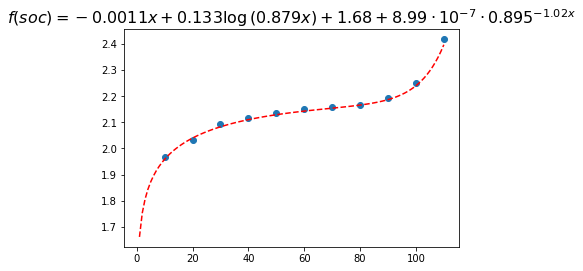

2.2390927366410778


In [11]:
"""
Use sympy to generate the latex sintax of the function
"""
fs = lambda x: np.format_float_scientific(x, unique=False, precision=2)
poptR = np.array(list(map(fs, popt))).astype(float)
print(f"potR {poptR}")
xs = sym.Symbol('x')    
tex = sym.latex(modelLatex(xs,*poptR)).replace('$', '')
plt.title(r'$f(soc)= %s$' %(tex),fontsize=16) 
vcell_approx = model(soc_line, *poptR)
plt.plot(soc_line, vcell_approx, '--', color='red')
error = lambda x: np.absolute(model(x, *poptR)/vcell[(x/10-1).astype(int)] - 1)
print(f"max error is: {np.max(error(soc)):.4%}") 
print(f"min error is: {np.min(error(soc)):.4%}") 
print(f"mean error is: {np.mean(error(soc)):.4%}")
plt.scatter(soc, vcell)
plt.show()
print(model(100,*poptR))